In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import data_cleaner as dc
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
import importlib
importlib.reload(dc)
%matplotlib inline

## Convert 2017 and 2018 excel files to CSVs

In [188]:
dc.sqf_excel_to_csv('../data/stop_frisk','sqf-2017.xlsx','2017')

In [189]:
dc.sqf_excel_to_csv('../data/stop_frisk','sqf-2018.xlsx','2018')

## Look at 2011, the highest-stop year

In [ ]:
df2011 = pd.read_csv('../data/stop_frisk/2011_top.csv', encoding='cp437', )

In [25]:
df2011.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2011,102,185,1012011,0,A,O,P,1,BURGLARY,...,,102,B,,,1030708,194185,CM,1,14
1,2011,115,50,1012011,5,A,O,P,1,FEL,...,,115,I,,,1021302,213563,CM,1,85
2,2011,100,4,1012011,7,1,O,H,1,CPW,...,,100,B,4,34,1037668,153549,CM,1,20
3,2011,100,3,1012011,7,1,O,H,1,CPW,...,,100,B,4,34,1037668,153549,CM,1,20
4,2011,100,1,1012011,7,1,O,H,1,CPW,...,,100,B,4,34,1037668,153549,CM,1,20


In [26]:
df2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 112 entries, year to detailcm
dtypes: int64(19), object(93)
memory usage: 874.2+ KB


## Load file specifications

In [53]:
filespecs = dc.load_filespecs('../data/stop_frisk/filespecs')

### 2017 and 2018 have different file specifications

In [37]:
filespecs2018 = pd.read_excel(f'../data/stop_frisk/filespecs/2018 SQF File Spec.xlsx')
filespecs2018

,"Stop, Question, and Frisk. Stop, Question and Frisk Trespass",Variable Position
0,STOP_FRISK_ID,A
1,STOP_FRISK_DATE,B
2,Stop Frisk Time,C
3,YEAR2,D
4,MONTH2,E
...,...,...
78,STOP_LOCATION_X,CA
79,STOP_LOCATION_Y,CB
80,STOP_LOCATION_ZIP_CODE,CC
81,STOP_LOCATION_PATROL_BORO_NAME,CD


### See if file specifications have changed over the years

In [193]:
for year in range(2004, 2017):
    print(year, filespecs[2003].equals(filespecs[year]))

2004 True
2005 True
2006 True
2007 True
2008 True
2009 True
2010 True
2011 False
2012 False
2013 False
2014 False
2015 False
2016 False


In 2011, the variable "forceuse" was added.

In [68]:
filespecs[2011].Variable[79]

'forceuse'

In [87]:
filespecs[2011].loc[79]

Variable                      forceuse
Position                            80
Label                REASON FORCE USED
Measurement Level              Nominal
Column Width                         4
Alignment                         Left
Print Format                        A1
Write Format                        A1
Name: 79, dtype: object

The file specifications are otherwise the same.

In [85]:
filespecs[2003].Variable.equals(filespecs[2011].Variable[:79].append(filespecs[2011].Variable[80:],ignore_index=True))

True

In [60]:
filespecs[2011][~(filespecs[2011] == filespecs[2013]).all(axis=1)]

,Variable,Position,Label,Measurement Level,Column Width,Alignment,Print Format,Write Format
91,addrtyp,92,LOCATION OF STOP ADDRESS TYPE,Nominal,9,Left,A1,A1


## Load stop-and-frisk data

`dc.load_sqfs(data, start=2003, end=2008)` loads and cleans the data (default 2003 to 2008). (Notably, 2006 has some differently named columns from the specification file. DOB is converted to a date field. Null-equivalent values are set to NaN.) Currently works 2003 to 2016.

In [69]:
stop_frisks = dc.load_sqfs('../data/stop_frisk', start=2003, end=2016)

Loading 2003...
Loading 2004...
Loading 2005...
Loading 2006...
Loading 2007...
Loading 2008...
Loading 2009...
Loading 2010...
Loading 2011...
Loading 2012...
Loading 2013...
Loading 2014...
Loading 2015...
Loading 2016...
Done.


## Working on loading 2017

In [71]:
filespecs[2017]

,Variable Label,Variable Position
0,STOP_FRISK_ID,A
1,STOP_FRISK_DATE,B
2,STOP_FRISK_TIME,C
3,YEAR2,D
4,MONTH2,E
...,...,...
81,STOP_LOCATION_X,CD
82,STOP_LOCATION_Y,CE
83,STOP_LOCATION_ZIP_CODE,CF
84,STOP_LOCATION_PATROL_BORO_NAME,CG


In [69]:
df = pd.read_csv('../data/stop_frisk/2017.csv', encoding='cp437')
df.columns.to_list()

['STOP_FRISK_ID',
 'STOP_FRISK_DATE',
 'STOP_FRISK_TIME',
 'YEAR2',
 'MONTH2',
 'DAY2',
 'STOP_WAS_INITIATED',
 'RECORD_STATUS_CODE',
 'ISSUING_OFFICER_RANK',
 'ISSUING_OFFICER_COMMAND_CODE',
 'SUPERVISING_OFFICER_RANK',
 'SUPERVISING_OFFICER_COMMAND_CODE',
 'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED',
 'LOCATION_IN_OUT_CODE',
 'JURISDICTION_CODE',
 'JURISDICTION_DESCRIPTION',
 'OBSERVED_DURATION_MINUTES',
 'SUSPECTED_CRIME_DESCRIPTION',
 'STOP_DURATION_MINUTES',
 'OFFICER_EXPLAINED_STOP_FLAG',
 'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION',
 'OTHER_PERSON_STOPPED_FLAG',
 'SUSPECT_ARRESTED_FLAG',
 'SUSPECT_ARREST_OFFENSE',
 'SUMMONS_ISSUED_FLAG',
 'SUMMONS_OFFENSE_DESCRIPTION',
 'OFFICER_IN_UNIFORM_FLAG',
 'ID_CARD_IDENTIFIES_OFFICER_FLAG',
 'SHIELD_IDENTIFIES_OFFICER_FLAG',
 'VERBAL_IDENTIFIES_OFFICER_FLAG',
 'FRISKED_FLAG',
 'SEARCHED_FLAG',
 'OTHER_CONTRABAND_FLAG',
 'FIREARM_FLAG',
 'KNIFE_CUTTER_FLAG',
 'OTHER_WEAPON_FLAG',
 'WEAPON_FOUND_FLAG',
 'PHYSICAL_FORCE_CEW_

In [70]:
stop_frisks[2016].columns.to_list()

['year',
 'pct',
 'ser_num',
 'datestop',
 'timestop',
 'recstat',
 'inout',
 'trhsloc',
 'perobs',
 'crimsusp',
 'perstop',
 'typeofid',
 'explnstp',
 'othpers',
 'arstmade',
 'arstoffn',
 'sumissue',
 'sumoffen',
 'compyear',
 'comppct',
 'offunif',
 'officrid',
 'frisked',
 'searched',
 'contrabn',
 'adtlrept',
 'pistol',
 'riflshot',
 'asltweap',
 'knifcuti',
 'machgun',
 'othrweap',
 'pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other',
 'radio',
 'ac_rept',
 'ac_inves',
 'rf_vcrim',
 'rf_othsw',
 'ac_proxm',
 'rf_attir',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'rf_vcact',
 'cs_cloth',
 'cs_drgtr',
 'ac_evasv',
 'ac_assoc',
 'cs_furtv',
 'rf_rfcmp',
 'ac_cgdir',
 'rf_verbl',
 'cs_vcrim',
 'cs_bulge',
 'cs_other',
 'ac_incid',
 'ac_time',
 'rf_knowl',
 'ac_stsnd',
 'ac_other',
 'sb_hdobj',
 'sb_outln',
 'sb_admis',
 'sb_other',
 'repcmd',
 'revcmd',
 'rf_furt',
 'rf_bulg',
 'offverb',
 'offshld',
 'forceuse',


In [68]:
dc.add_datetimestop(stop_frisks[2011])
stop_frisks[2011].head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,state,zip,addrpct,sector,beat,xcoord,ycoord,dettypcm,detailcm,datetimestop
0,2011,102,185,1012011,0,A,O,P,1,BURGLARY,...,NaN,NaN,102.0,B,NaN,1030708.0,194185.0,CM,14,2011-01-01 00:00:00
1,2011,115,50,1012011,5,A,O,P,1,FEL,...,NaN,NaN,115.0,I,NaN,1021302.0,213563.0,CM,85,2011-01-01 00:05:00
2,2011,100,4,1012011,7,1,O,H,1,CPW,...,NaN,NaN,100.0,B,4.0,1037668.0,153549.0,CM,20,2011-01-01 00:07:00
3,2011,100,3,1012011,7,1,O,H,1,CPW,...,NaN,NaN,100.0,B,4.0,1037668.0,153549.0,CM,20,2011-01-01 00:07:00
4,2011,100,1,1012011,7,1,O,H,1,CPW,...,NaN,NaN,100.0,B,4.0,1037668.0,153549.0,CM,20,2011-01-01 00:07:00


In [25]:
stop_frisks[2012].head().perstop.apply(lambda x: type(x) != int)

0    True
1    True
2    True
3    True
4    True
Name: perstop, dtype: bool

2006 has the additional variable "wepfound"

### concatenate date and time fields into a datetime field

In [46]:
dc.add_datetimestops(stop_frisks)
stop_frisks[2007].head().datetimestop

Processing 2003...
Processing 2004...
Processing 2005...
Processing 2006...
Processing 2007...
Processing 2008...
Processing 2009...
Processing 2010...
Processing 2011...
Processing 2012...
Processing 2013...
Processing 2014...
Processing 2015...
Processing 2016...
Done.


0   2007-01-02 15:30:00
1   2007-01-04 22:10:00
2   2007-01-08 18:10:00
3   2007-01-09 19:10:00
4   2007-01-14 19:20:00
Name: datetimestop, dtype: datetime64[ns]

### Concatenate the dataframes:

In [47]:
stop_frisk = dc.concat_dict_of_dfs(stop_frisks)

In [291]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [ ]:
# this can kill the kernel
# df = stop_frisk_03_08.resample('D', on='datetimestop').count()
# df.plot(x='datetimestop', y='pct', marker='.', alpha=0.5, linestyle='None')

In [48]:
stop_frisks[2006].loc[(stop_frisks[2006].pistol == 1) | (stop_frisks[2006].riflshot == 1)][['pistol','riflshot','wepfound']]

,pistol,riflshot,wepfound
189,1,0,1
2580,1,0,1
3440,1,0,1
4073,1,0,1
11077,1,0,1
...,...,...,...
502058,1,0,1
502059,1,0,1
502060,1,0,1
502061,1,0,1


In [106]:
for year in range(2003, 2009):
    print(year, stop_frisks[year].repcmd.value_counts())

2003         4172
077     3911
103     3685
075     3266
803     2837
        ... 
VICE       1
SDRG       1
NBSI       1
76         1
232        1
Name: repcmd, Length: 660, dtype: int64
2004         104837
75       17574
103      16559
77        6947
67        5772
         ...  
460          1
ONGS         1
IA           1
QNTP         1
OSA8         1
Name: repcmd, Length: 1484, dtype: int64
2005 075     21349
077     13269
103     13074
079      8684
101      7425
        ...  
HG I        1
TBH0        1
BXSC        1
D002        1
640         1
Name: repcmd, Length: 3274, dtype: int64
2006 075    21428
103    17028
802    16121
079    12607
805    10301
       ...  
276        1
558        1
451        1
504        1
228        1
Name: repcmd, Length: 348, dtype: int64
2007 802    16410
075    15558
079    12274
070     9336
120     8692
       ...  
859        1
571        1
357        1
567        1
454        1
Name: repcmd, Length: 343, dtype: int64
2008 075    21613
802    

In [121]:
stop_frisks[2003].head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2003,70,5,1012003,03:00,,O,,1,ROBBERY,...,,,,,,,,,,
1,2003,70,3,1012003,03:00,,O,,1,ROBBERY,...,,,,,,,,,,
2,2003,68,1406,1012003,03:00,,I,,1,CPW,...,,,,,,,,,,
3,2003,48,4,1012003,16:00,,I,,1,BURGLARY,...,,,,,,,,,,
4,2003,48,999991,1022003,03:35,,O,,30,ROBBERY,...,,,,,,,,,,


In [49]:
test = pd.read_csv(f'../data/stop_frisk/2003.csv', encoding='cp437', 
                   na_values=[' ','12311900'],
                   dtype={'repcmd' : str, 'revcmd' : str }) 


In [55]:
test.dob.dt.year

0         1986.0
1         1988.0
2         1963.0
3            NaN
4         1983.0
           ...  
160846       NaN
160847    1977.0
160848       NaN
160849       NaN
160850    1973.0
Name: dob, Length: 160851, dtype: float64

In [119]:
pd.options.display.max_rows = 112

In [54]:
test.dob = pd.to_datetime(test.dob, format='%m%d%Y', errors='coerce')

In [52]:
for i, dob in enumerate(test.dob):
    if dob == dob:
        if int(dob[:2]) > 12:
            print(i, dob)
        if int(dob[2:4]) > 31:
            print(i, dob)
        if (int(dob[4:]) < 1910) or (int(dob[4:]) > 1990):
            print(i, dob, test.datestop[i])


163 01011901 11082003
220 11192003 1012003
316 08132003 1012003
641 10082002 1022003
769 01021903 1022003
1208 08102003 1032003
1235 06092003 1032003
1350 11212003 1042003
1364 09152003 1042003
1616 07290198 1042003
1716 03151998 1052003
1951 09231991 1052003
2079 11150169 1062003
2141 02021996 1062003
2501 07271997 1072003
2526 03230984 1072003
2529 05252002 1072003
2594 02012003 1072003
2598 11272003 1072003
2662 01041697 1072003
3005 07252003 1082003
3134 02172003 1082003
3217 01200971 1082003
3285 02280953 1082003
3309 02092474 1082003
3537 01092003 1092003
3711 05142003 1092003
3713 10252003 1092003
3741 08010184 1092003
3762 06251698 1092003
4296 02172003 1102003
4609 08044982 1102003
4754 04300196 1102003
4994 01072000 1112003
5157 08211903 1112003
5243 05161992 1112003
5350 02220181 1122003
5770 01131903 1132003
5784 06061991 1132003
5881 10302003 1132003
6034 05202002 1132003
6125 11131999 1142003
6425 10271900 1142003
6752 01162003 1152003
7433 01162003 1162003
7459 01010957 

In [72]:
stop_frisks.keys()

dict_keys([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [77]:
[print(year, data.shape[0]) for year, data in stop_frisks.items()];

2003 160851
2004 313523
2005 398191
2006 506491
2007 472096
2008 540302
2009 581168
2010 601285
2011 685724
2012 532911
2013 191851
2014 45787
2015 22563
2016 12405


In [18]:
nyc = pd.read_csv('data/df.csv')
nyc = nyc.iloc[:,1:]

In [83]:
nyc

,YEAR,ADDR_PCT_CD,CMPLNTS,POPULATION,ARRESTS,STOPS,STOP_ARRESTS
0,2006.0,1.0,6279.0,66679.0,4024.0,NaN,NaN
1,2007.0,1.0,6762.0,66679.0,4797.0,NaN,NaN
2,2008.0,1.0,6614.0,66679.0,5008.0,2506.0,221.0
3,2009.0,1.0,6280.0,66679.0,5371.0,2585.0,238.0
4,2010.0,1.0,5895.0,66679.0,4950.0,2446.0,260.0
...,...,...,...,...,...,...,...
989,2014.0,121.0,7103.0,NaN,4874.0,1817.0,66.0
990,2015.0,121.0,6767.0,NaN,3772.0,725.0,39.0
991,2016.0,121.0,6430.0,NaN,3749.0,95.0,16.0
992,2017.0,121.0,6290.0,NaN,3038.0,120.0,33.0


In [94]:
stop_frisks[2006][stop_frisks[2006].pct == 1].shape[0]

1967

In [95]:
stop_frisks[2008][stop_frisks[2008].pct == 1].shape[0]

2506

In [102]:
dc.add_datetimestops(stop_frisks)

In [103]:
stop_frisk = dc.concat_dict_of_dfs(stop_frisks)

In [104]:
stop_frisk.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,xcoord,ycoord,dettypcm,detailcm,datetimestop,wepfound,forceuse,dettypCM,lineCM,detailCM
0,2003.0,70,5.0,01012003,03:00,NaN,O,NaN,1.0,ROBBERY,...,NaN,NaN,NaN,NaN,2003-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
1,2003.0,70,3.0,01012003,03:00,NaN,O,NaN,1.0,ROBBERY,...,NaN,NaN,NaN,NaN,2003-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
2,2003.0,68,1406.0,01012003,03:00,NaN,I,NaN,1.0,CPW,...,NaN,NaN,NaN,NaN,2003-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
3,2003.0,48,4.0,01012003,16:00,NaN,I,NaN,1.0,BURGLARY,...,NaN,NaN,NaN,NaN,2003-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN
4,2003.0,48,999991.0,01022003,03:35,NaN,O,NaN,30.0,ROBBERY,...,NaN,NaN,NaN,NaN,2003-01-02 03:35:00,NaN,NaN,NaN,NaN,NaN


In [105]:
stop_frisk[['pct','year','arstmade'.groupby(['pct', 'year'], )

5065148

In [106]:
stop_frisk.arstmade.value_counts()

N    4758306
Y     306840
Name: arstmade, dtype: int64

In [109]:
stop_frisk.arstmade.index

RangeIndex(start=0, stop=5065148, step=1)

In [110]:
stop_frisk.index

RangeIndex(start=0, stop=5065148, step=1)

In [113]:
stop_frisk.arstmade = dc.y_n_to_1_0(stop_frisk.arstmade)

In [114]:
stop_frisk.arstmade.value_counts()

0    4758308
1     306840
Name: arstmade, dtype: int64

In [115]:
[data.arstmade.isna().sum() for data in stop_frisks.values()]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [116]:
stop_frisks[2004][stop_frisks[2004].arstmade.isna()]

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,state,zip,addrpct,sector,beat,xcoord,ycoord,dettypcm,detailcm,datetimestop
275921,2004,73.0,15697,07292004,22:30,A,NaN,NaN,1.0,GRAND LARCENY AUTO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-07-29 22:30:00


In [120]:
stop_frisks[2004].crimsusp.value_counts().head(100)

CPW                               62593
CRIMINAL TRESPASS                 34863
BURGLARY                          32048
ROBBERY                           30114
GRAND LARCENY AUTO                25643
CRIMINAL POSSESSION OF CONTROL     7443
CRIMINAL SALE OF CONTROLLED SU     6821
GLA                                6632
ASSAULT                            6408
DRUG SALES                         5925
CRIMINAL POSSESSION OF MARIHUA     5187
CRIMINAL TRESSPASS                 4047
CRIMINAL MISCHIEF                  3295
GRAND LARCENY                      3139
CPSP                               2701
CPCS                               2500
PETIT LARCENY                      2438
TRESPASS                           2386
BURG                               1678
CSCS                               1660
CRIM TRESPASS                      1589
CRIM TRES                          1567
ASSAULT 3                          1544
GLA - GRAND LARCENY AUTO           1366
CPM                                1267


In [8]:
df = stop_frisks[2004]

In [13]:
df = df[['datetimestop','pct','crimsusp','arstmade']]

In [15]:
df['stop'] = 1
df.groupby(by='pct').sum()

,arstmade,stop
pct,,
1.0,58,831
5.0,68,960
6.0,143,1920
7.0,271,2609
9.0,151,2527
...,...,...
114.0,615,5034
115.0,364,5411
120.0,401,7177


In [16]:
df = stop_frisk.copy()
df['stop'] = 1
df[['year','pct','stop','arstmade']].groupby(by=['year','pct']).sum()

stop  arstmade
year   pct                  
2003.0 1.0     637        44
       5.0     644       118
       6.0     732        86
       7.0    1711       154
       9.0    1695       151
...            ...       ...
2016.0 115.0   136        48
       120.0   219        36
       121.0    95        16
       122.0   249        57
       123.0    90        32

[1068 rows x 2 columns]

In [22]:
stop_arrests = df[['year','pct','stop','arstmade']].groupby(by=['year','pct']).sum()

Text(0.5, 1.0, 'NYC Stop and Frisk 2003-2016')

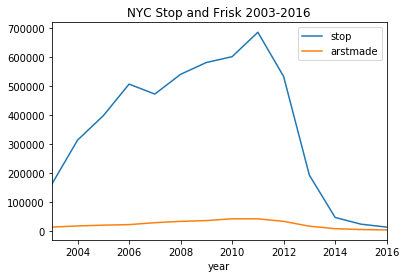

In [82]:
stop_arrests.groupby(by='year').sum().plot()
plt.title('NYC Stop and Frisk 2003-2016')

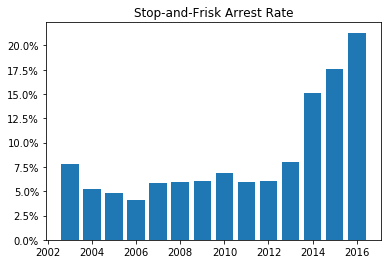

In [80]:
total_stop_arrests = stop_arrests.groupby(by='year').sum()
plt.bar(total_stop_arrests.index, total_stop_arrests.arstmade / total_stop_arrests.stop)
plt.title('Stop-and-Frisk Arrest Rate')
import matplotlib.ticker as mtick
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))


In [20]:
nyc

,YEAR,ADDR_PCT_CD,CMPLNTS,POPULATION,ARRESTS,STOPS,STOP_ARRESTS
0,2006.0,1.0,6279.0,66679.0,4024.0,NaN,NaN
1,2007.0,1.0,6762.0,66679.0,4797.0,NaN,NaN
2,2008.0,1.0,6614.0,66679.0,5008.0,2506.0,221.0
3,2009.0,1.0,6280.0,66679.0,5371.0,2585.0,238.0
4,2010.0,1.0,5895.0,66679.0,4950.0,2446.0,260.0
...,...,...,...,...,...,...,...
989,2014.0,121.0,7103.0,NaN,4874.0,1817.0,66.0
990,2015.0,121.0,6767.0,NaN,3772.0,725.0,39.0
991,2016.0,121.0,6430.0,NaN,3749.0,95.0,16.0
992,2017.0,121.0,6290.0,NaN,3038.0,120.0,33.0


In [28]:
stop_frisk.pistol.value_counts()

N    5046872
Y       7415
1         54
Name: pistol, dtype: int64

In [41]:
VARS_OF_INTEREST = 'year, datestop, timestop, datetimestop, pct, xcoord, ycoord, arstmade, crimsusp, wepfound, pistol, sex, race, age, ht_feet, ht_inch, weight, haircolr, eyecolor, build'.split(', ')

In [42]:
stop_frisk.query('pistol == "1"')[VARS_OF_INTEREST]

,year,datestop,timestop,datetimestop,pct,xcoord,ycoord,arstmade,crimsusp,wepfound,pistol,sex,race,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build
5011623,2014.0,8182014,5,NaT,67,1004709.0,172703.0,1,CPW,NaN,1,M,B,28.0,6.0,0.0,170.0,BK,BR,T
5011793,2014.0,7022014,130,NaT,44,1008578.0,245125.0,1,CPW,NaN,1,M,B,18.0,5.0,8.0,180.0,BK,BR,M
5011870,2014.0,7022014,1914,NaT,49,1021292.0,247243.0,1,FEL,NaN,1,M,Q,21.0,5.0,6.0,200.0,BK,BR,M
5012130,2014.0,7052014,2,NaT,69,1010451.0,169550.0,1,CPW,NaN,1,M,B,19.0,6.0,0.0,180.0,BK,BR,M
5012259,2014.0,7062014,100,NaT,47,1021485.0,260564.0,1,FEL,NaN,1,M,B,16.0,5.0,6.0,150.0,BK,BR,T
5012447,2014.0,7082014,1340,NaT,47,1026265.0,262142.0,1,FEL/CPW,NaN,1,M,B,27.0,5.0,8.0,160.0,BK,BK,M
5012486,2014.0,7082014,2113,NaT,23,1000675.0,227972.0,1,FEL,NaN,1,M,B,20.0,5.0,9.0,148.0,BK,BR,T
5012783,2014.0,7112014,120,NaT,67,1005385.0,179619.0,1,FEL,NaN,1,M,B,14.0,5.0,7.0,160.0,BK,BR,T
5012784,2014.0,7112014,120,NaT,67,1005385.0,179619.0,1,FEL,NaN,1,M,B,21.0,5.0,8.0,170.0,BK,BR,M
5012786,2014.0,7112014,120,NaT,67,1005385.0,179619.0,1,FEL,NaN,1,M,B,21.0,5.0,10.0,170.0,BK,BR,T


In [52]:
stop_frisk.othrweap.value_counts()

N    5039098
Y      15189
1         89
Name: othrweap, dtype: int64

In [67]:
col = stop_frisks[2014].othrweap
print(col.value_counts())
yes_value='Y'
out = pd.Series(np.where(col.isin((yes_value, "1")), 1, 0), col.index)
out.value_counts()

N    34653
Y      274
1       89
Name: othrweap, dtype: int64


0    45424
1      363
dtype: int64